In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude
import k3match

from Test.TESToperators import old_calc_grad, calc_grad, make_tree, another_grad

In [2]:
def search_delta(X, Y, Z, point, dim_cell, choose):
    x_point = point[0]
    y_point = point[1]
    z_point = point[2]

    _, _ , dist= k3match.cartesian(X, Y, Z, x_point, y_point, z_point, 2.5*dim_cell)

    # print('how many neighbours? ', np.shape(dist))
    
    if choose == 'mean':
        delta = np.mean(dist)
    if choose == 'min':
        delta = np.min(dist)
    if choose == 'max':
        delta = np.max(dist)
    
    return delta

In [3]:
sim_tree, X, Y, Z, Vol, VX, _, _, _, _, _ = make_tree('sedov/100', 100)
dim_cell = (3*Vol/(4*np.pi))**(1/3)
#choose an easy function to know its derivative
VX = np.sin(X) 

all T=0, bro. Compute by myself!


In [4]:
step_big_arbitrary = 0.3
step_grad_meantot = 2*np.mean(dim_cell)
step_grad_mintot = 2*np.min(dim_cell)

In [5]:
grad_big = []
grad_meantot = []
grad_mintot = []
grad_meanloc = []
grad_maxloc = []
grad_minloc = []
grad_test = []
final_idea = []
to_plot = []
X_plot = [] 
Y_plot = [] 
Z_plot = [] 

for i in range(len(X)):
    #print(i)
    point = [X[i],Y[i],Z[i]]

    if np.linalg.norm(point)>0.98:
        continue

    to_plot.append(np.cos(X[i])) #d/dx(sinx)
    X_plot.append(X[i])
    Y_plot.append(Y[i])
    Z_plot.append(Z[i])
    final_idea.append(another_grad(sim_tree, X, Y, Z, VX, point)[0])

    grad_big.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_big_arbitrary)[0])
    grad_meantot.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_meantot)[0])
    grad_mintot.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_mintot)[0])
    
    step_grad_meanloc = search_delta(X, Y, Z, point, dim_cell[i], 'mean')
    grad_meanloc.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_meanloc)[0])
    step_grad_maxloc = search_delta(X, Y, Z, point, dim_cell[i], 'max')
    grad_maxloc.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_maxloc)[0])
    step_grad_minloc = search_delta(X, Y, Z, point, dim_cell[i], 'min')
    grad_minloc.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_minloc)[0])

    grad_test.append(calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_mintot)[0])

/Users/paolamartire/shocks/Test/TESToperators.py:111: RuntimeWarning: invalid value encountered in scalar divide
  delta_fx = (fpost_x-fpre_x) / (post_xcoord-pre_xcoord)
/Users/paolamartire/shocks/Test/TESToperators.py:112: RuntimeWarning: invalid value encountered in scalar divide
  delta_fy = (fpost_y-fpre_y)/ (post_ycoord-pre_ycoord)
/Users/paolamartire/shocks/Test/TESToperators.py:113: RuntimeWarning: invalid value encountered in scalar divide
  delta_fz = (fpost_z-fpre_z) / (post_zcoord-pre_zcoord)


In [6]:
final_idea = np.array(final_idea)
grad_big = np.array(grad_big)
grad_meantot = np.array(grad_meantot)
grad_mintot = np.array(grad_mintot)
grad_meanloc = np.array(grad_meanloc)
grad_maxloc = np.array(grad_maxloc)
grad_minloc = np.array(grad_minloc)
grad_test = np.array(grad_test)
final_idea = np.array(final_idea)
to_plot = np.array(to_plot)

In [7]:
ratio_finalidea = 1- final_idea / to_plot 
ratio_big = 1- grad_big / to_plot 
ratio_meantot = 1- grad_meantot / to_plot
ratio_mintot = 1- grad_mintot / to_plot
ratio_meanloc = 1- grad_meanloc / to_plot
ratio_minloc = 1- grad_minloc / to_plot
ratio_maxloc = 1- grad_maxloc / to_plot
ratio_test = 1- grad_test / to_plot
ratio_final = 1- final_idea / to_plot

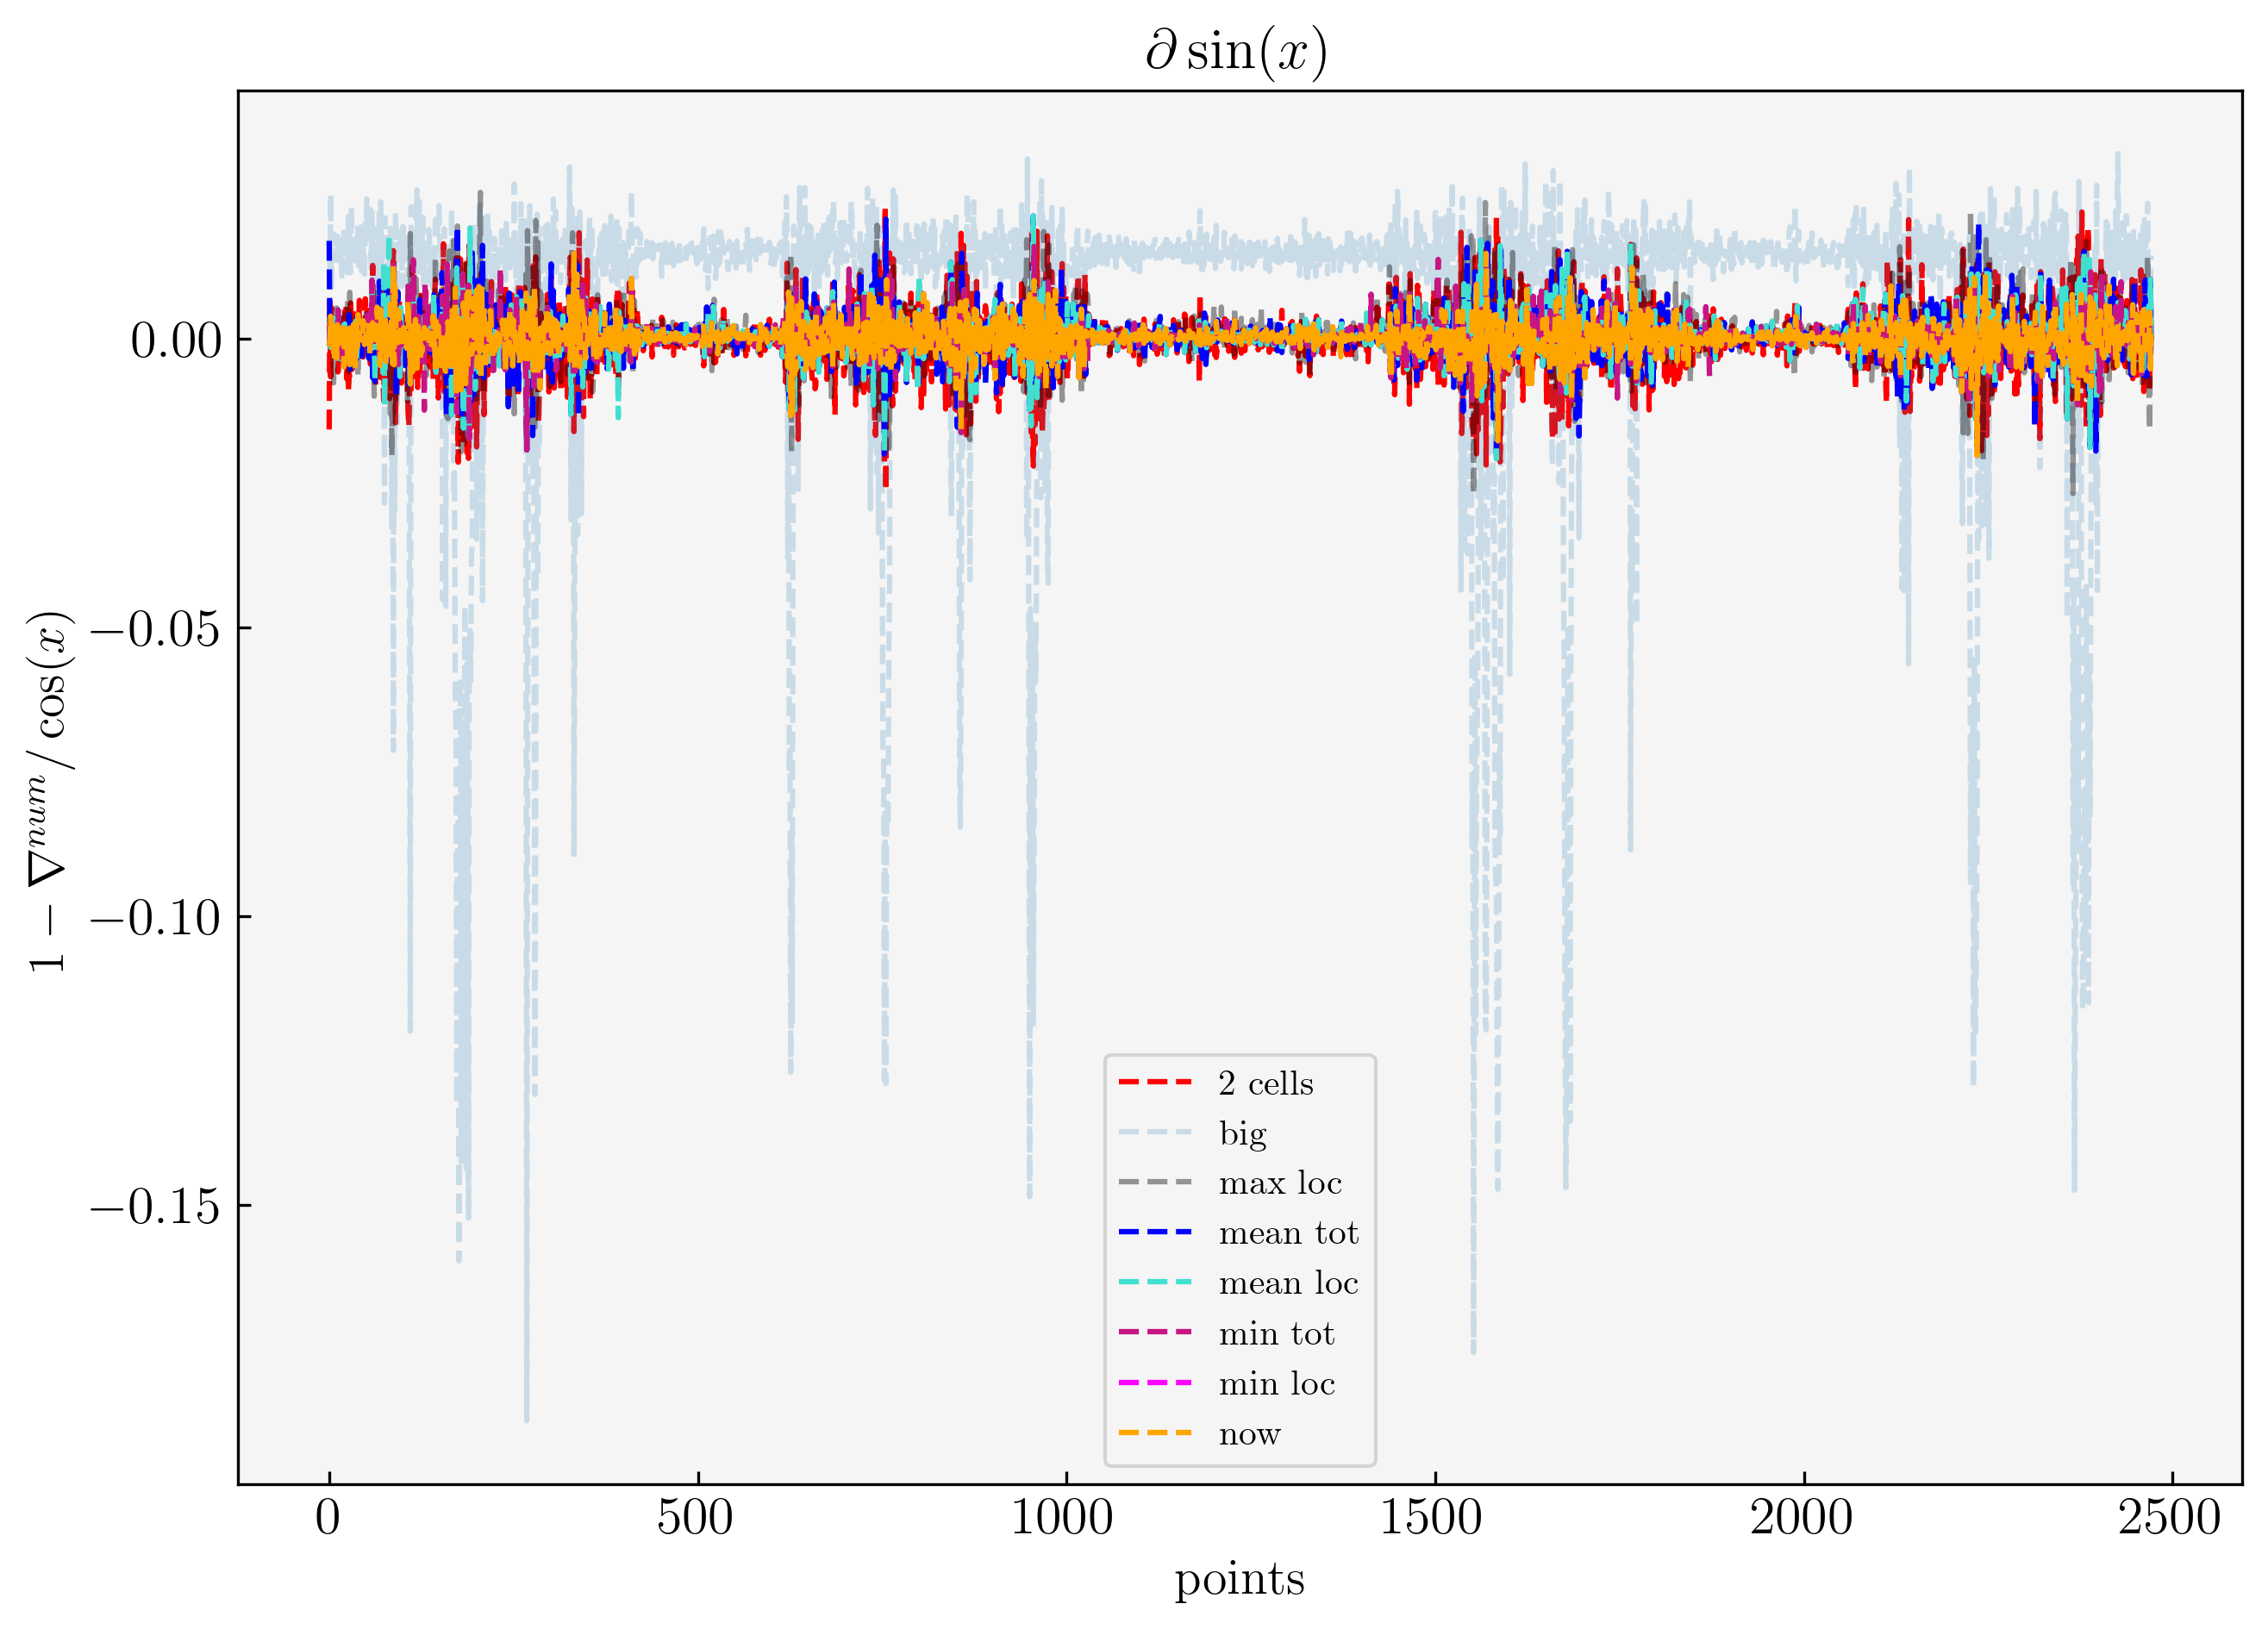

In [14]:
# - Gradient T
fig, ax = plt.subplots(1,1, figsize = (10,7))
ax.set_xlabel('points', fontsize = 14)
ax.set_ylabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax.plot(ratio_final[::20], '--', label = '2 cells', c = 'r')
ax.plot(ratio_big[::20], '--', label = 'big', alpha = 0.2)
ax.plot(ratio_maxloc[::20], '--', label = 'max loc', alpha = 0.4, c = 'k')
ax.plot(ratio_meantot[::20], '--', c = 'b', label = 'mean tot')
ax.plot(ratio_meanloc[::20], '--', c = 'turquoise', label = 'mean loc')
ax.plot(ratio_mintot[::20], '--', c = 'mediumvioletred', label = 'min tot')
ax.plot(ratio_minloc[::20], '--', c = 'magenta', label = 'min loc')
ax.plot(ratio_test[::20], '--', c = 'orange',label = 'now')
#ax.plot(ratio_final, '--', label = 'final')
plt.legend()
plt.title(r'$\partial\sin(x)$', fontsize = 16)
plt.savefig(f'TESTgrad.pdf')

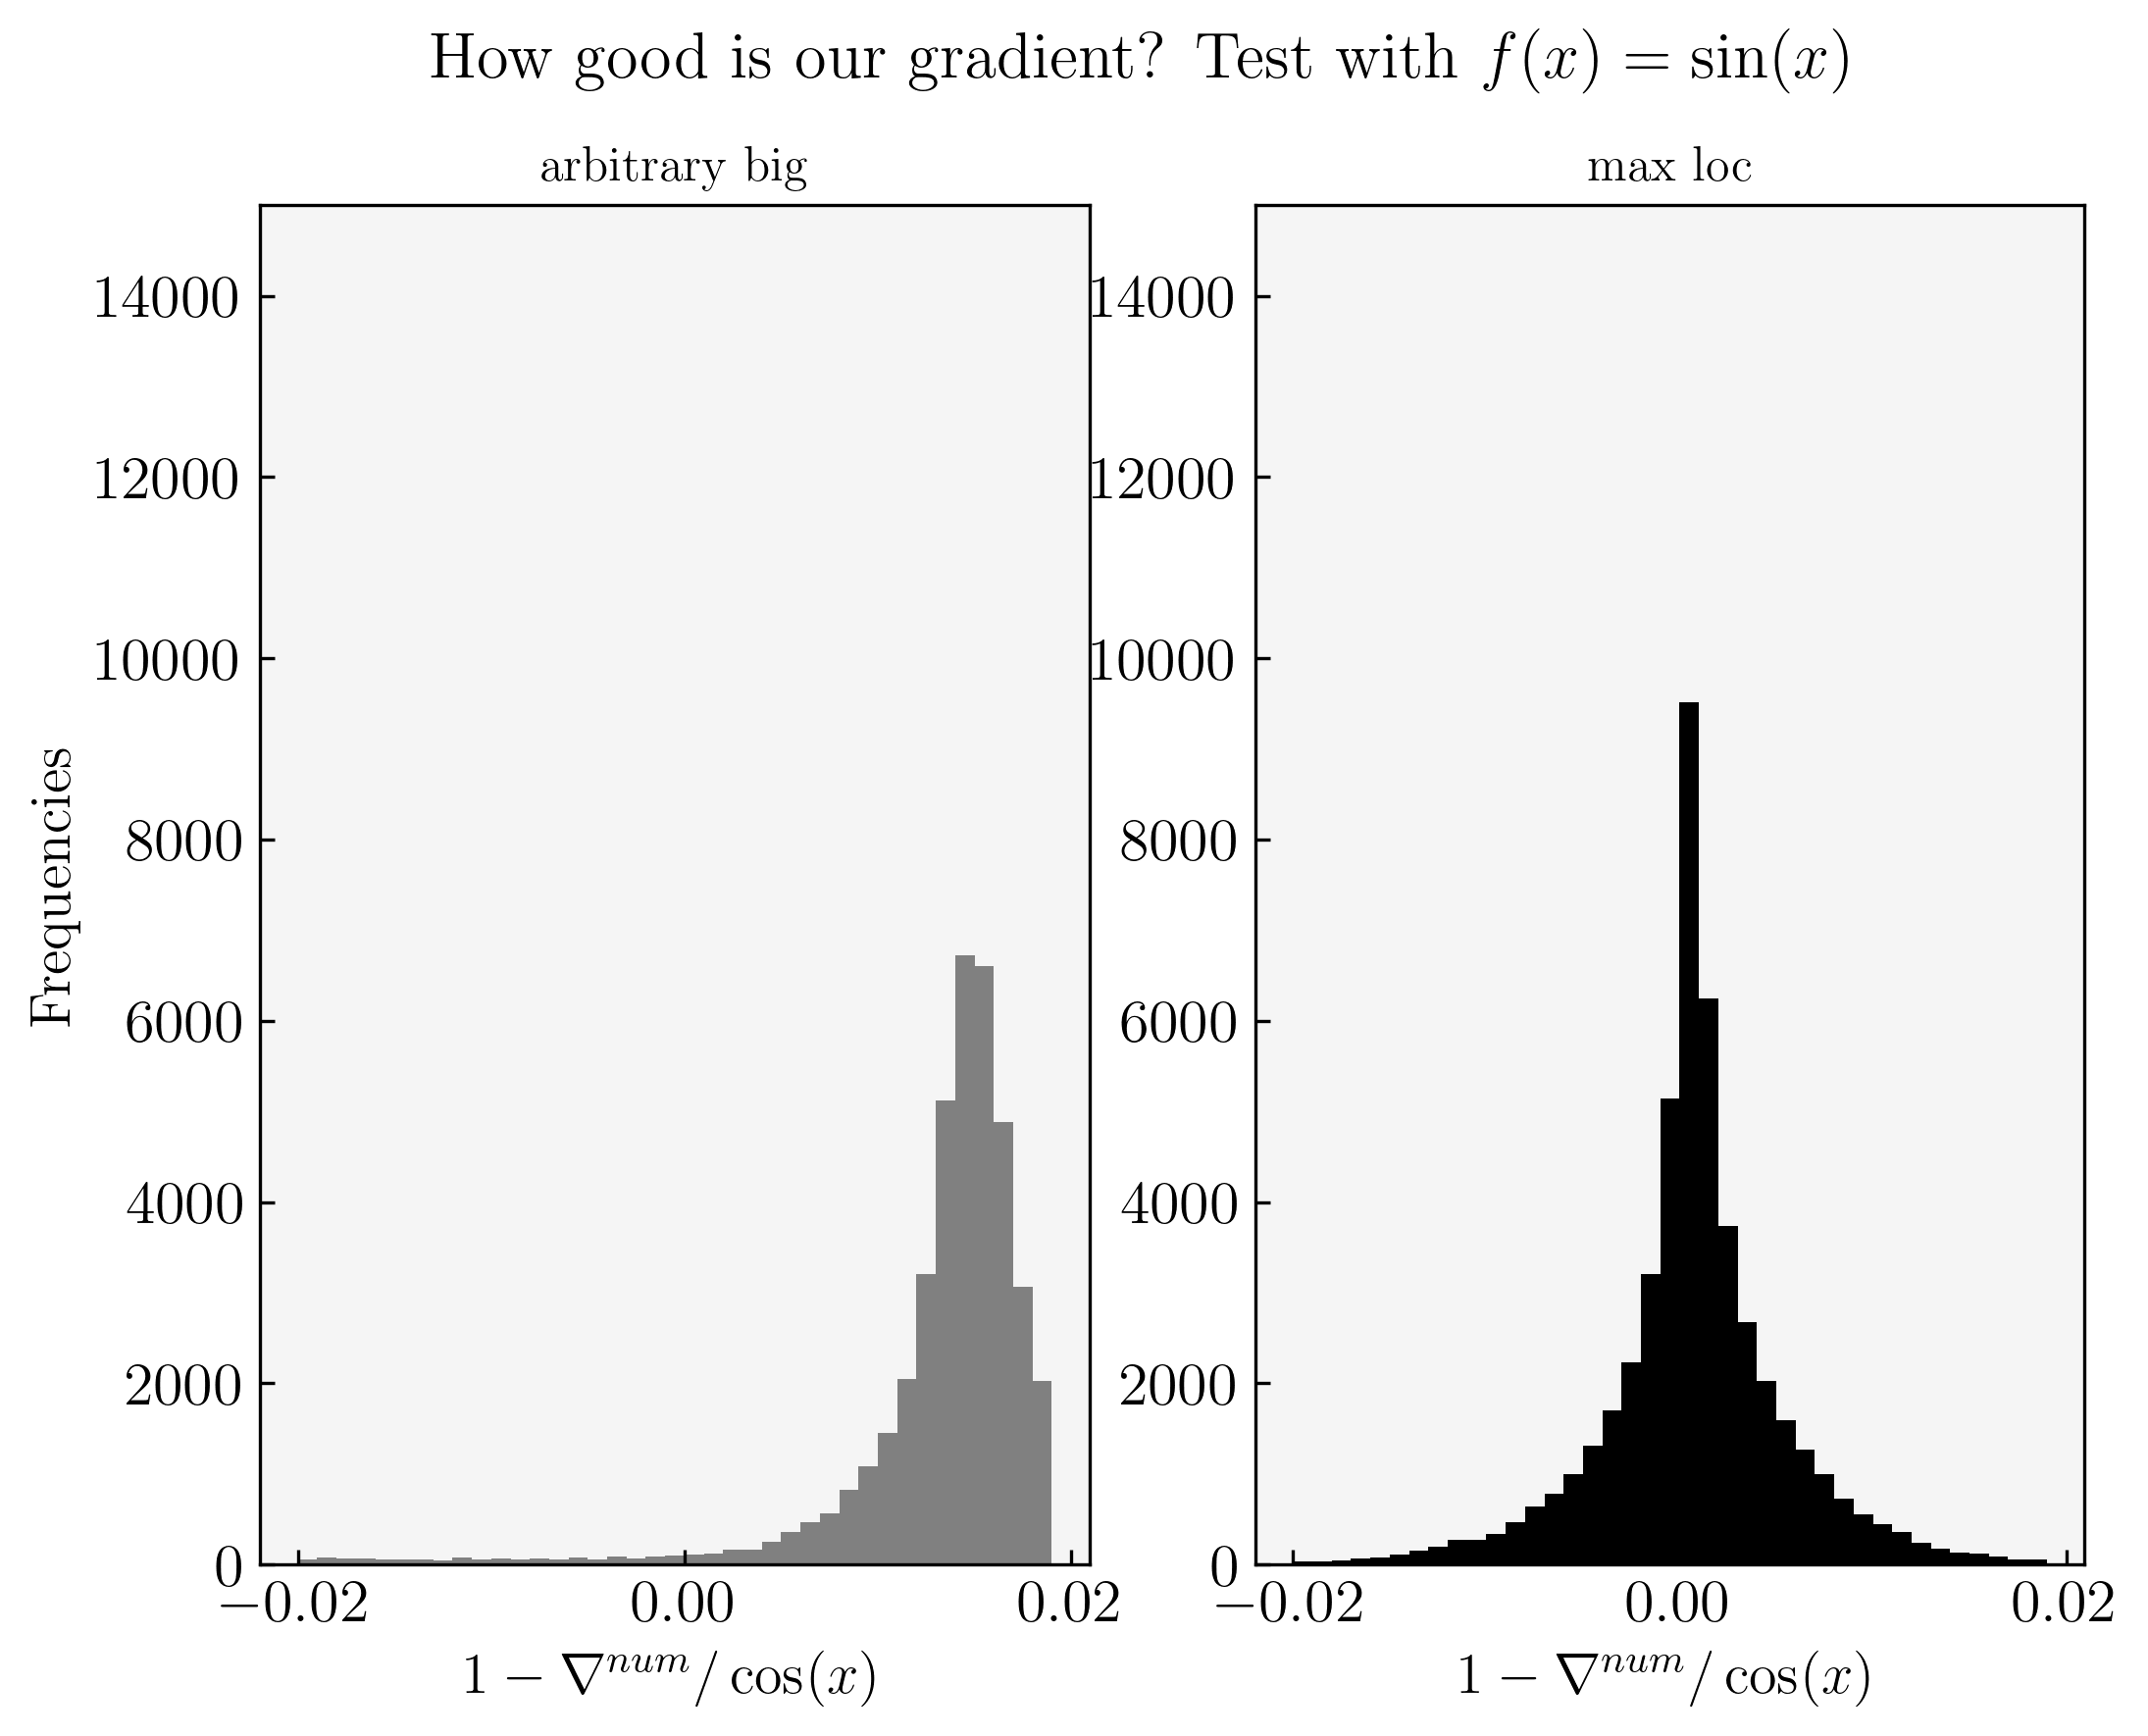

In [18]:
# # Histograms to see how big is the gradient. X component
# fig, ax1 = plt.subplots(1,2)
# bins = np.arange(-0.02, 0.02, 0.001)
# ax1[0].hist(ratio_big, bins = bins, color = 'gray')
# ax1[1].hist(ratio_maxloc, bins = bins, color = 'k')

# ax1[0].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
# ax1[1].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
# ax1[0].set_ylabel('Frequencies', fontsize = 14)
# ax1[0].set_title('arbitrary big')
# ax1[0].set_ylim(0,15_000)
# ax1[1].set_title('max loc')
# ax1[1].set_ylim(0,15_000)
# plt.suptitle(r'How good is our gradient? Test with $f(x)=\sin(x)$', fontsize = 16)
# plt.savefig('TESTgradhistworst.png')

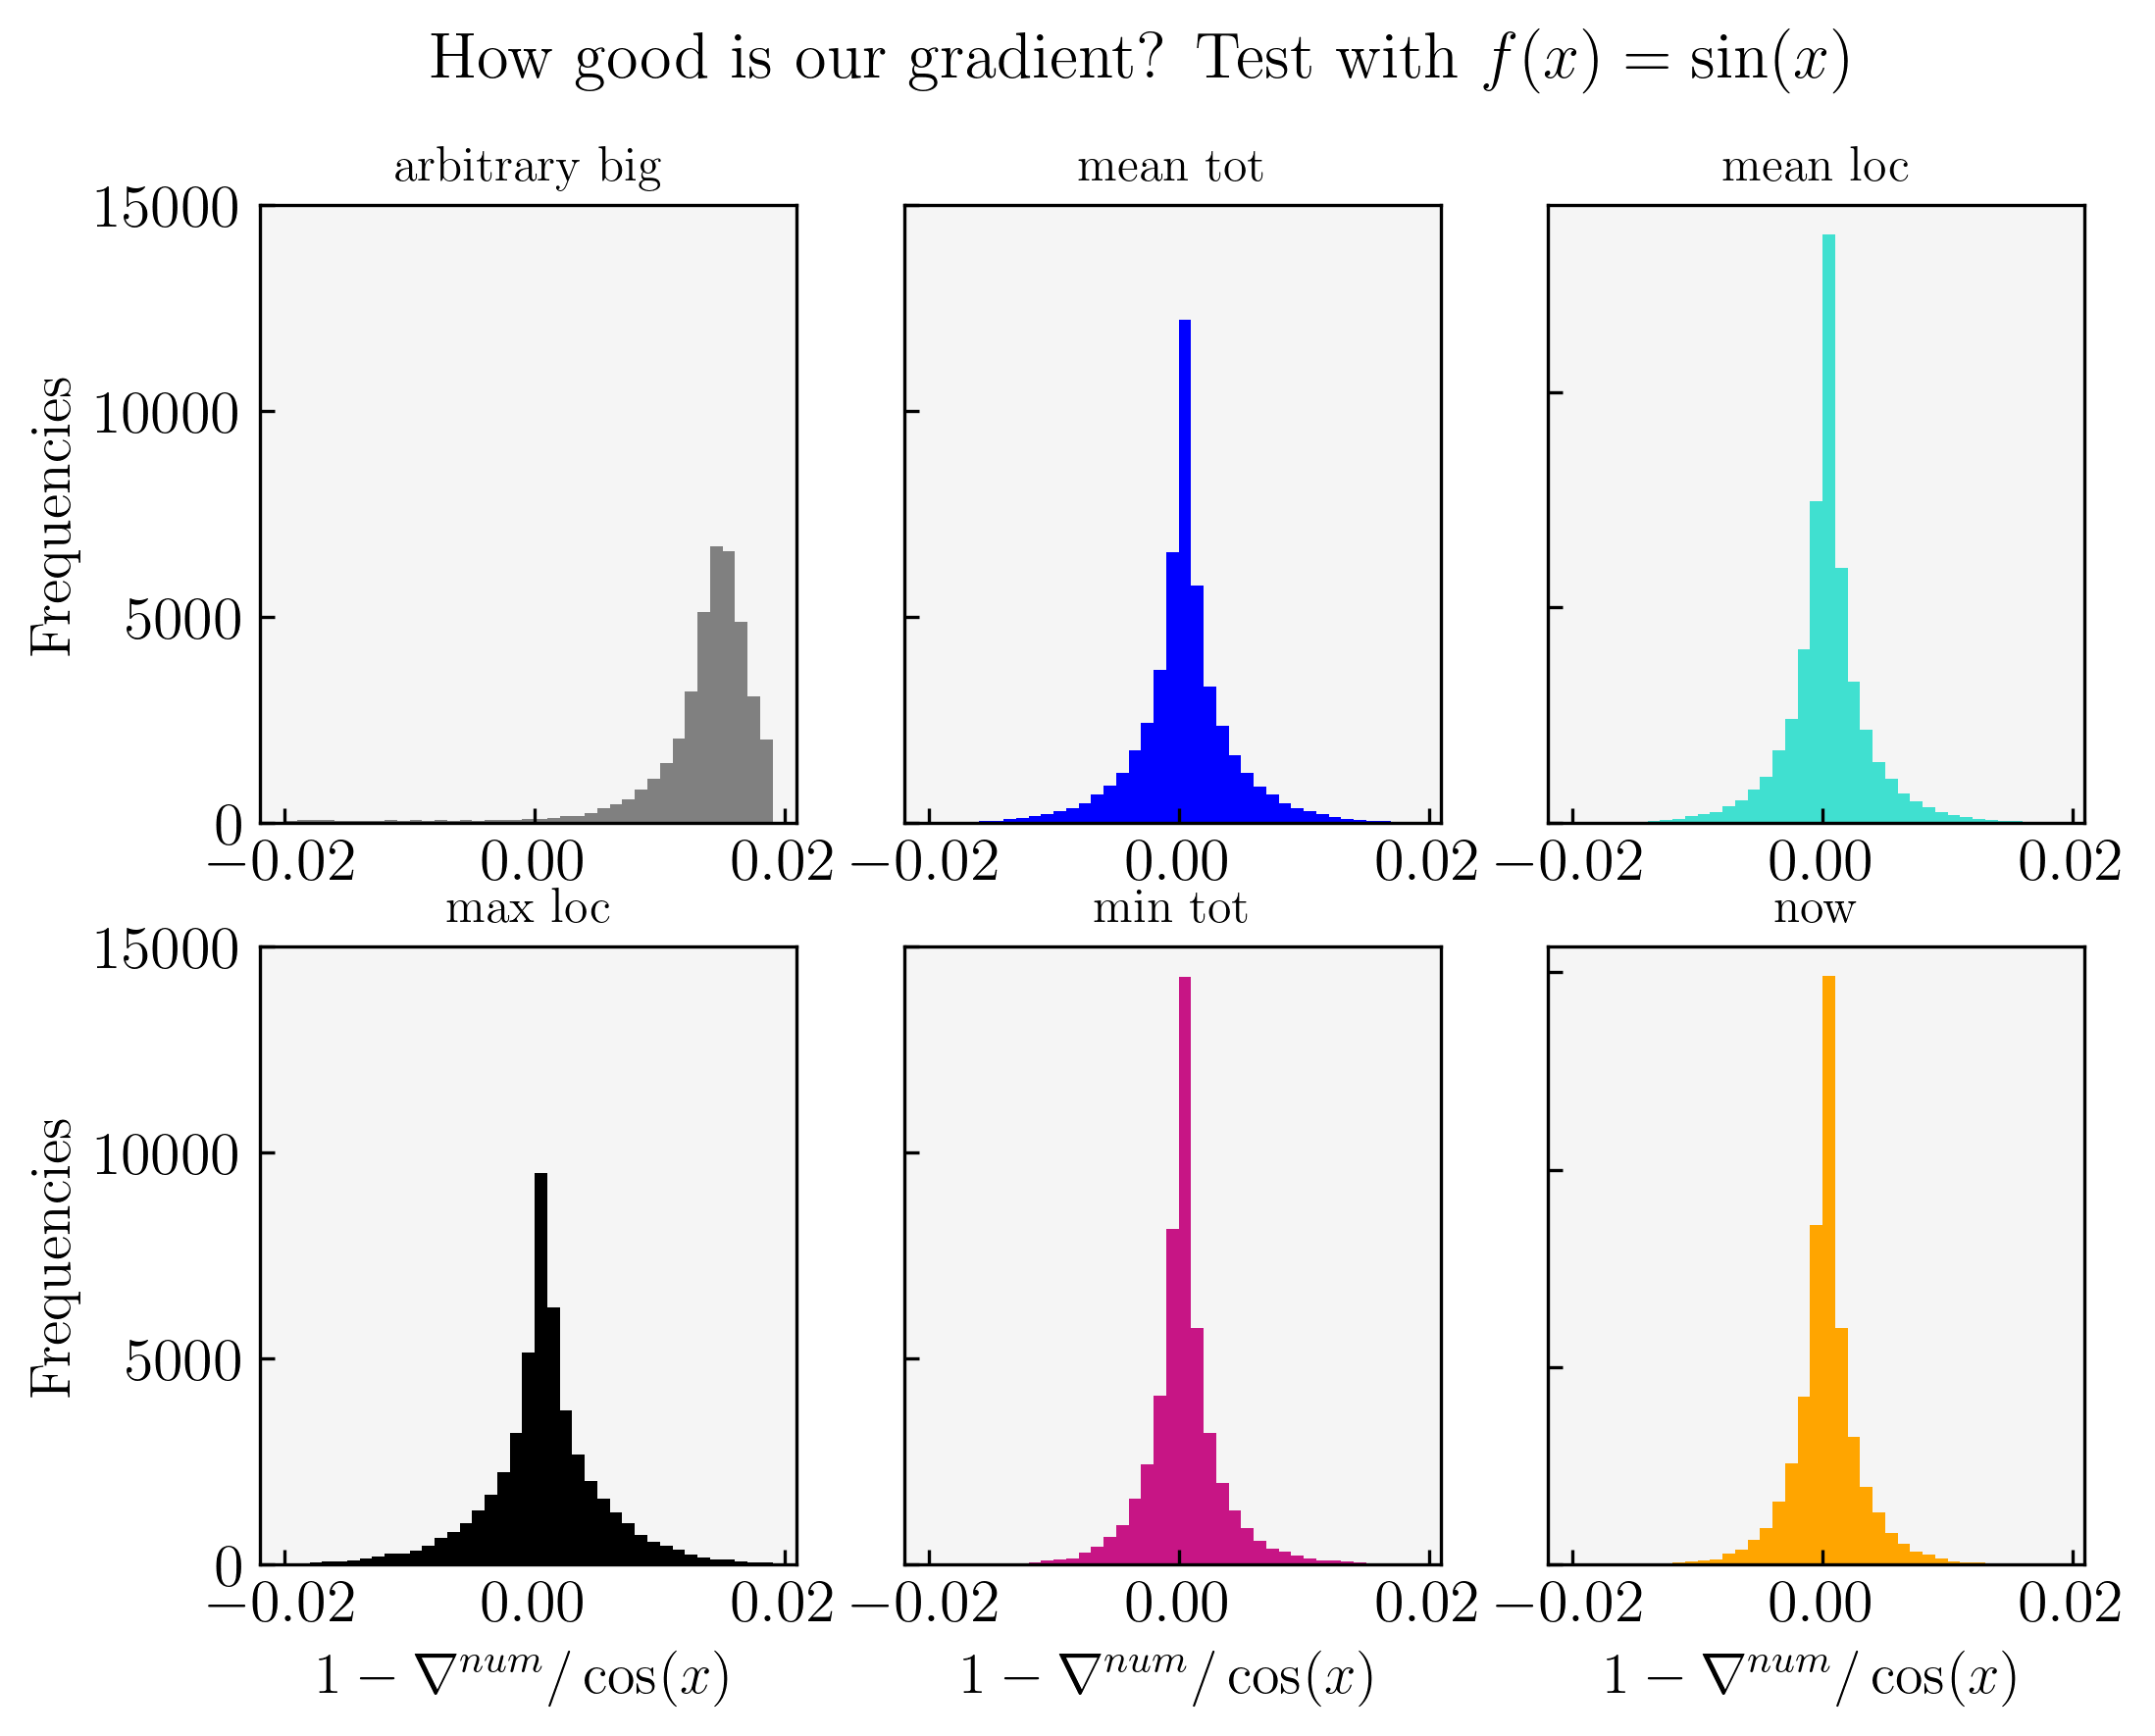

In [32]:
# Histograms to see how big is the gradient. X component
fig, ax = plt.subplots(2,3)
bins = np.arange(-0.02, 0.02, 0.001)
ax[0][0].hist(ratio_big, bins = bins, color = 'gray', label = 'arbitrary big')
ax[1][0].hist(ratio_maxloc, bins = bins, color = 'k', label = 'max loc')
ax[0][1].hist(ratio_meantot, bins = bins, color = 'b', label = 'mean tot')
ax[0][1].set_yticklabels([])
ax[1][1].hist(ratio_mintot, bins = bins, color = 'mediumvioletred', label = 'min tot')
ax[1][1].set_yticklabels([])
ax[0][2].hist(ratio_meanloc, bins = bins, color = 'turquoise', label = 'mean loc')
ax[0][2].set_yticklabels([])
ax[1][2].hist(ratio_test, bins = bins, color = 'orange', label = 'now')
ax[1][2].set_yticklabels([])

ax[1][0].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax[1][1].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax[1][2].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax[0][0].set_ylabel('Frequencies', fontsize = 14)
ax[1][0].set_ylabel('Frequencies', fontsize = 14)
ax[0][0].set_title('arbitrary big')
ax[0][0].set_ylim(0,15_000)
ax[1][0].set_title('max loc')
ax[1][0].set_ylim(0,15_000)
ax[0][1].set_title('mean tot')
ax[0][0].set_ylim(0,15_000)
ax[0][2].set_title('mean loc')
ax[0][1].set_ylim(0,15_000)
ax[1][1].set_title('min tot')
ax[1][0].set_ylim(0,15_000)
ax[1][2].set_title('now')
ax[1][1].set_ylim(0,15_000)
plt.suptitle(r'How good is our gradient? Test with $f(x)=\sin(x)$', fontsize = 16)
plt.savefig('Figs/TESTsedov_gradhist.png')

